#### 1. Data Loading
- **Load the Data:**
  - Read the dataset.
- **Initial Exploration:**
  - Use `df.head()` to view the first few rows.
  - Use `df.info()` and `df.describe()` to understand data types, ranges, and missing values.
- **Identify Key Columns:**
  - `PassengerId`, `Survived` (target), `Pclass`, `Name`, `Sex`, `Age`, `SibSp`, `Parch`, `Ticket`, `Fare`, `Cabin`, and `Embarked`.

#### 2. Exploratory Data Analysis (EDA)
- **Plot the survival distribution** (using matplotlib).
- **Feature Distributions:**
  - Visualize distributions for numerical features like `Age` and `Fare`.
  - Examine the distributions of categorical features such as `Pclass`, `Sex`, and `Embarked` using count plots.
- **Relationship Analysis:**
  - Compare survival rates across different groups (e.g., survival by `Pclass`, `Sex`, or `FamilySize` once created).
  - Use visualizations like bar charts, scatter plots, and heatmaps to uncover relationships.
- **Correlation Analysis:**
  - Plot a correlation matrix to see how features relate to one another and to the target variable.

#### 3. Data Cleaning & Feature Engineering
- **Handle Missing Values:**
  - Impute missing `Age` values (e.g., with the median or mean).
  - Fill missing values in `Embarked` (e.g., with the mode).
  - Deal with missing `Cabin` values (Deleting the whole column).
- **Create New Features:**
  - `FamilySize`:  
    ```python
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    ```
- **Drop Irrelevant Columns:**
  - Remove columns that don't add predictive value (e.g., `PassengerId`, `Name`, `Ticket`).

#### 4. Data Preprocessing
- **Encode Categorical Variables:**
  - Use techniques like label encoding for features such as `Sex`, `Embarked`.
- **Feature Scaling:**
  - Standardize or normalize numerical features if required by your models.
- **Train-Test Split:**
  - Split your data into training and testing sets (common split is 70/30) using `train_test_split`.

#### 5. Model Building
- **Select Models:**
  - Choose a range of classifiers to evaluate (e.g., Logistic Regression, Decision Tree, Random Forest, Support Vector Machine).
- **Training:**
  - Fit each model on the training data.
- **Prediction:**
  - Make predictions on the test data for each model.

#### 6. Model Evaluation
- **Calculate Evaluation Metrics:**
  - Compute metrics such as Accuracy, Precision, Recall, F1 Score, and the Confusion Matrix.
- **Detailed Evaluation:**
  - Use `classification_report` to get a full summary of each model's performance.
- **Visualization:**
  - Optionally, create a grouped bar chart to compare the performance of different models.

---

### **Libraries Used**
- `pandas`
- `numpy`
- `matplotlib`
- `seaborn`
- `sklearn`
- `xgboost`


## Importing required modules

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

## Data Loading

In [39]:
df_train = pd.read_csv('input/train.csv')
df_test = pd.read_csv('input/test.csv')

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Exploratory Data Analysis (EDA)

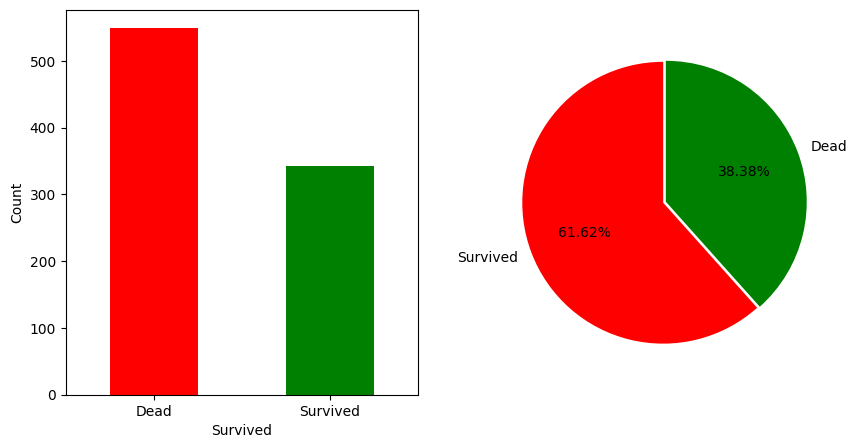

In [43]:
#Survived Analysis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=False)
df_train.groupby('Survived')['PassengerId'].count().plot(kind = 'bar', ax = axes[0], color = ['red', 'green'])
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Dead', 'Survived'], rotation = 0)

df_train.groupby('Survived')['PassengerId'].count().plot(kind = 'pie', ax = axes[1], colors = ['red', 'green'] ,labels = ['Survived', 'Dead'], autopct='%1.2f%%', startangle = 90, explode=(0.01, 0.01))
axes[1].set_ylabel('')
plt.show()

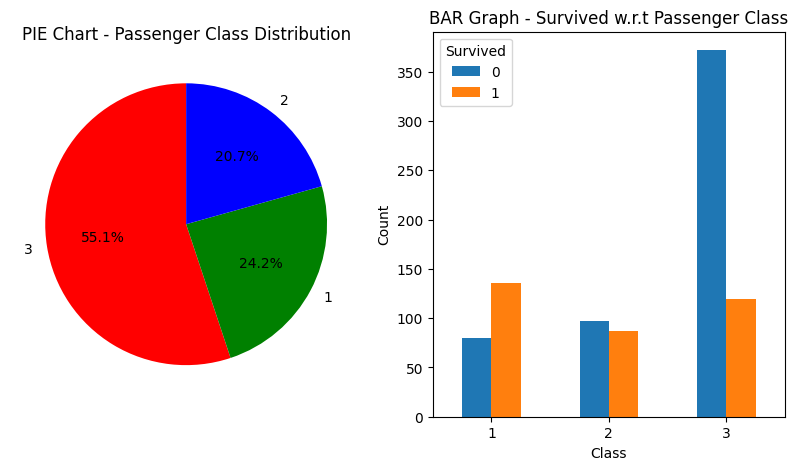

In [44]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=False)

# First Plot: Pie Chart (Fix Order)
pclass = df_train['Pclass'].value_counts()
axes[0].pie(pclass, labels=pclass.index, autopct='%1.1f%%', 
            colors=['red', 'green', 'blue'], startangle=90)

axes[0].set_title('PIE Chart - Passenger Class Distribution')
# Second Plot: Bar Chart (Fix Order)
pclassSurvived = df_train.groupby('Pclass')['Survived'].value_counts().unstack()
pclassSurvived.plot(kind='bar', ax=axes[1])

axes[1].set_title('BAR Graph - Survived w.r.t Passenger Class')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_xticks(range(len(pclassSurvived.index)))  
axes[1].set_xticklabels(pclassSurvived.index.to_list(), rotation=0)

plt.show()


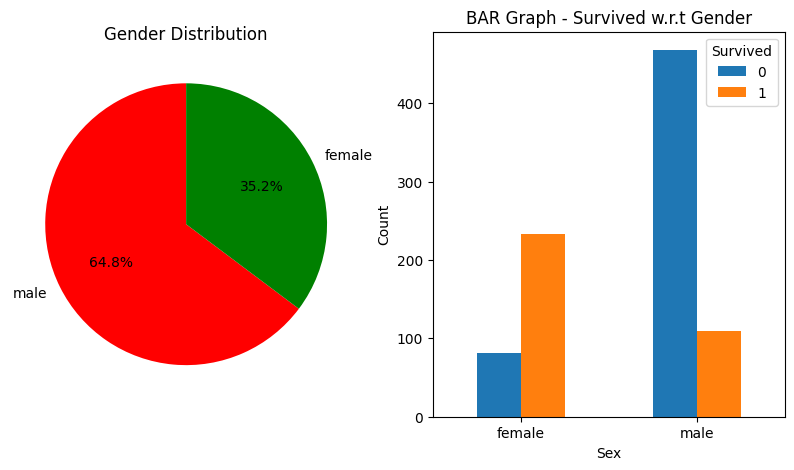

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=False)

# First Plot: Pie Chart (Fix Order)
psex = df_train['Sex'].value_counts()
axes[0].pie(psex, labels=psex.index, autopct='%1.1f%%', 
            colors=['red', 'green'], startangle=90)
axes[0].set_title('Gender Distribution')

# Second Plot: Bar Chart (Fix Order)
pclassSurvived = df_train.groupby('Sex')['Survived'].value_counts().unstack()
pclassSurvived.plot(kind='bar', ax=axes[1])
axes[1].set_title('BAR Graph - Survived w.r.t Gender')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Count')
axes[1].set_xticks(range(len(pclassSurvived.index)), labels = pclassSurvived.index.to_list(), rotation=0)  

plt.show()


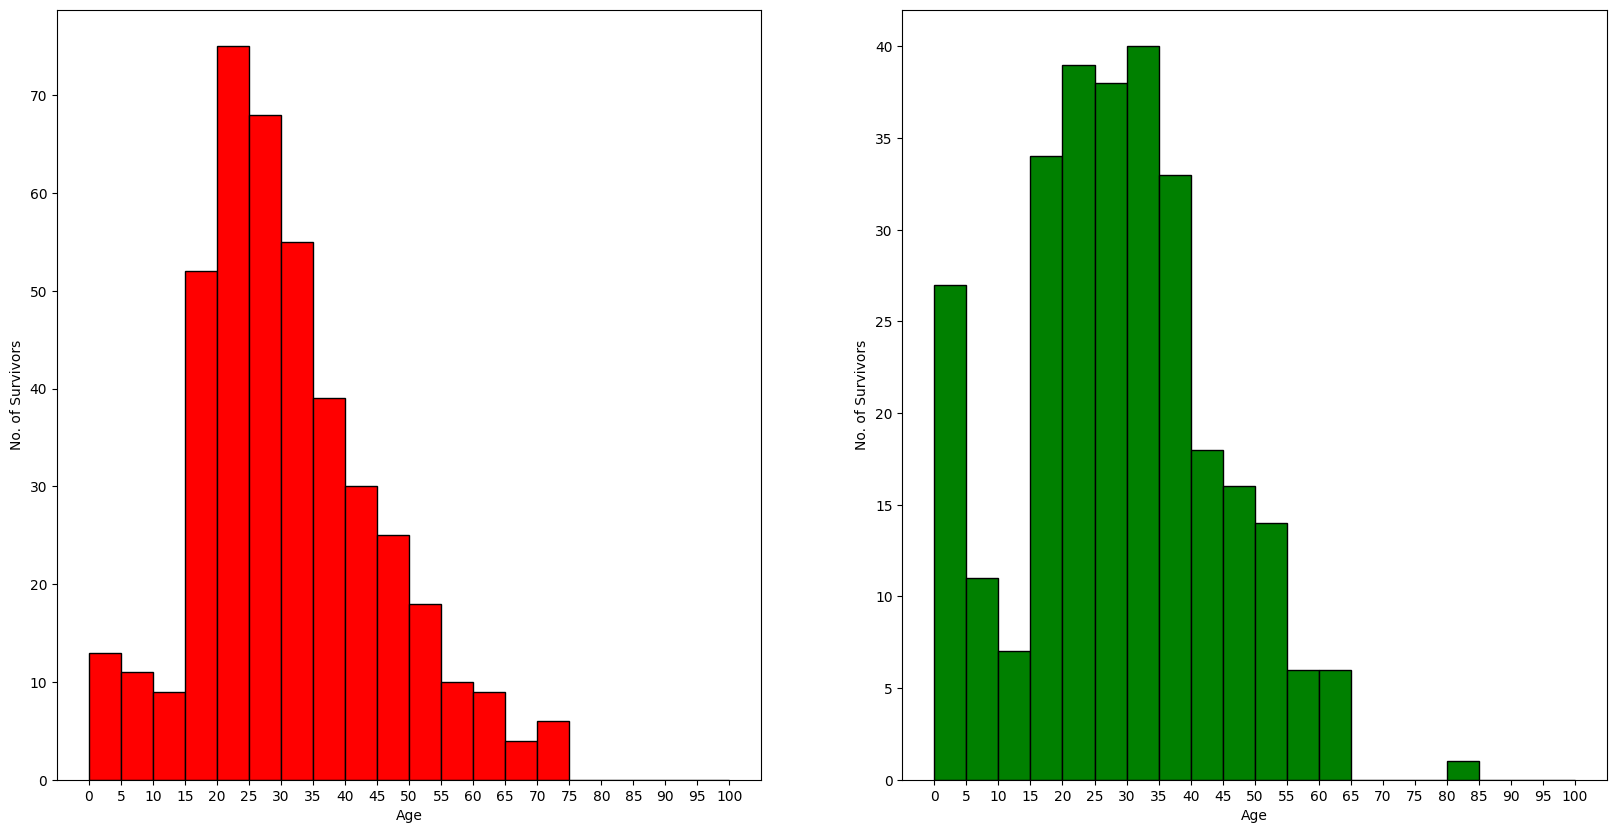

In [46]:
#Age and Survival
age = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=False)
axes[0].hist(df_train.loc[df_train['Survived'] == 0, 'Age'], bins = age, color='red', edgecolor = 'black', align='mid')
axes[0].set_xticks(age)

axes[0].set_xlabel('Age')
axes[0].set_ylabel('No. of Survivors')

axes[1].hist(df_train.loc[df_train['Survived'] == 1, 'Age'], bins = age, color='green', edgecolor = 'black')
axes[1].set_xticks(age)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('No. of Survivors')
plt.show()

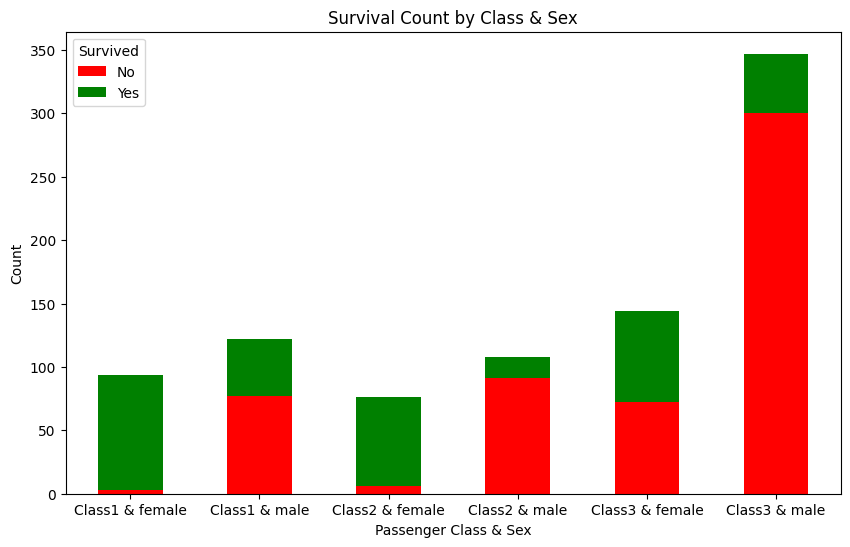

In [47]:
# Count data for plotting
SurvivalClassSex = df_train.groupby(['Pclass', 'Sex', 'Survived']).size().unstack()
SurvivalClassSex.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.xlabel('Passenger Class & Sex')
plt.ylabel('Count')
plt.title('Survival Count by Class & Sex')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(ticks=range(len(SurvivalClassSex.index)), labels=SurvivalClassSex.index.map(lambda x: f'Class{x[0]} & {x[1]}'), rotation=0)
plt.show()

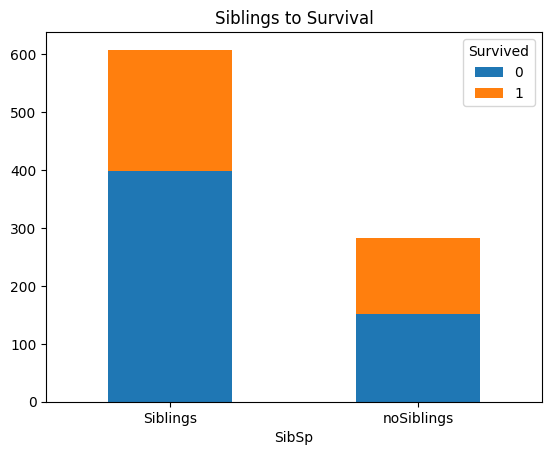

In [48]:
df_train.groupby([df_train['SibSp'].gt(0), 'Survived']).size().unstack().plot(kind='bar', stacked = True)
plt.xticks(ticks = [0, 1], labels = ['Siblings', 'noSiblings'], rotation = 0)
plt.title('Siblings to Survival')
plt.show()

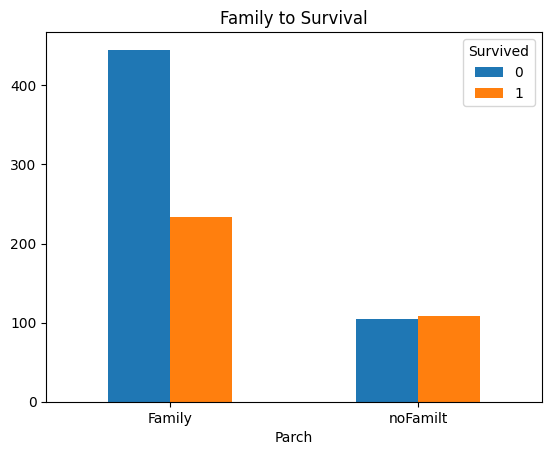

In [49]:
df_train.groupby(df_train['Parch'].gt(0))['Survived'].value_counts().unstack().plot(kind = 'bar')
plt.xticks(ticks = [0, 1], labels = ['Family', 'noFamilt'], rotation = 0)
plt.title('Family to Survival')
plt.show()

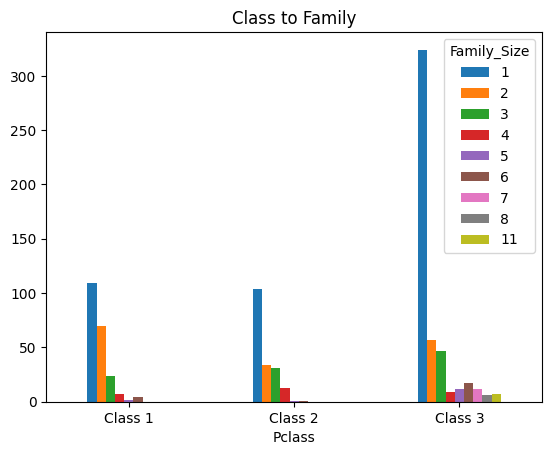

In [50]:
df_train['Family_Size'] = df_train['Parch'] + df_train['SibSp'] + 1
PclassFamily = df_train.groupby('Pclass')['Family_Size'].value_counts().unstack()
PclassFamily.plot(kind = 'bar')
plt.title('Class to Family')
plt.xticks(ticks = [0,1,2], labels = PclassFamily.index.map(lambda x : f'Class {x}'), rotation = 0)
plt.show()


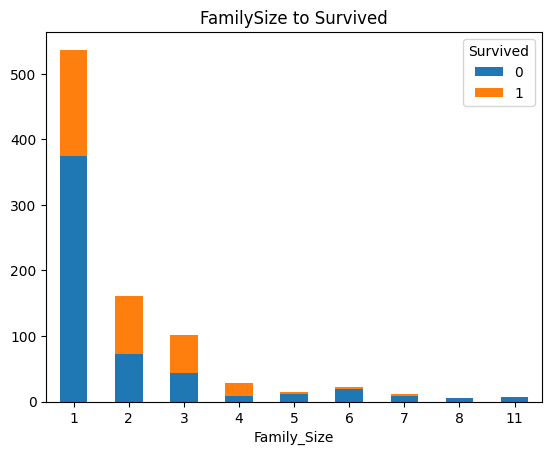

In [51]:
#Family size wrt survived
df_train.groupby('Family_Size')['Survived'].value_counts().unstack().plot(kind = 'bar', stacked=True)
plt.xticks(rotation = 0)
plt.title('FamilySize to Survived')
plt.show()

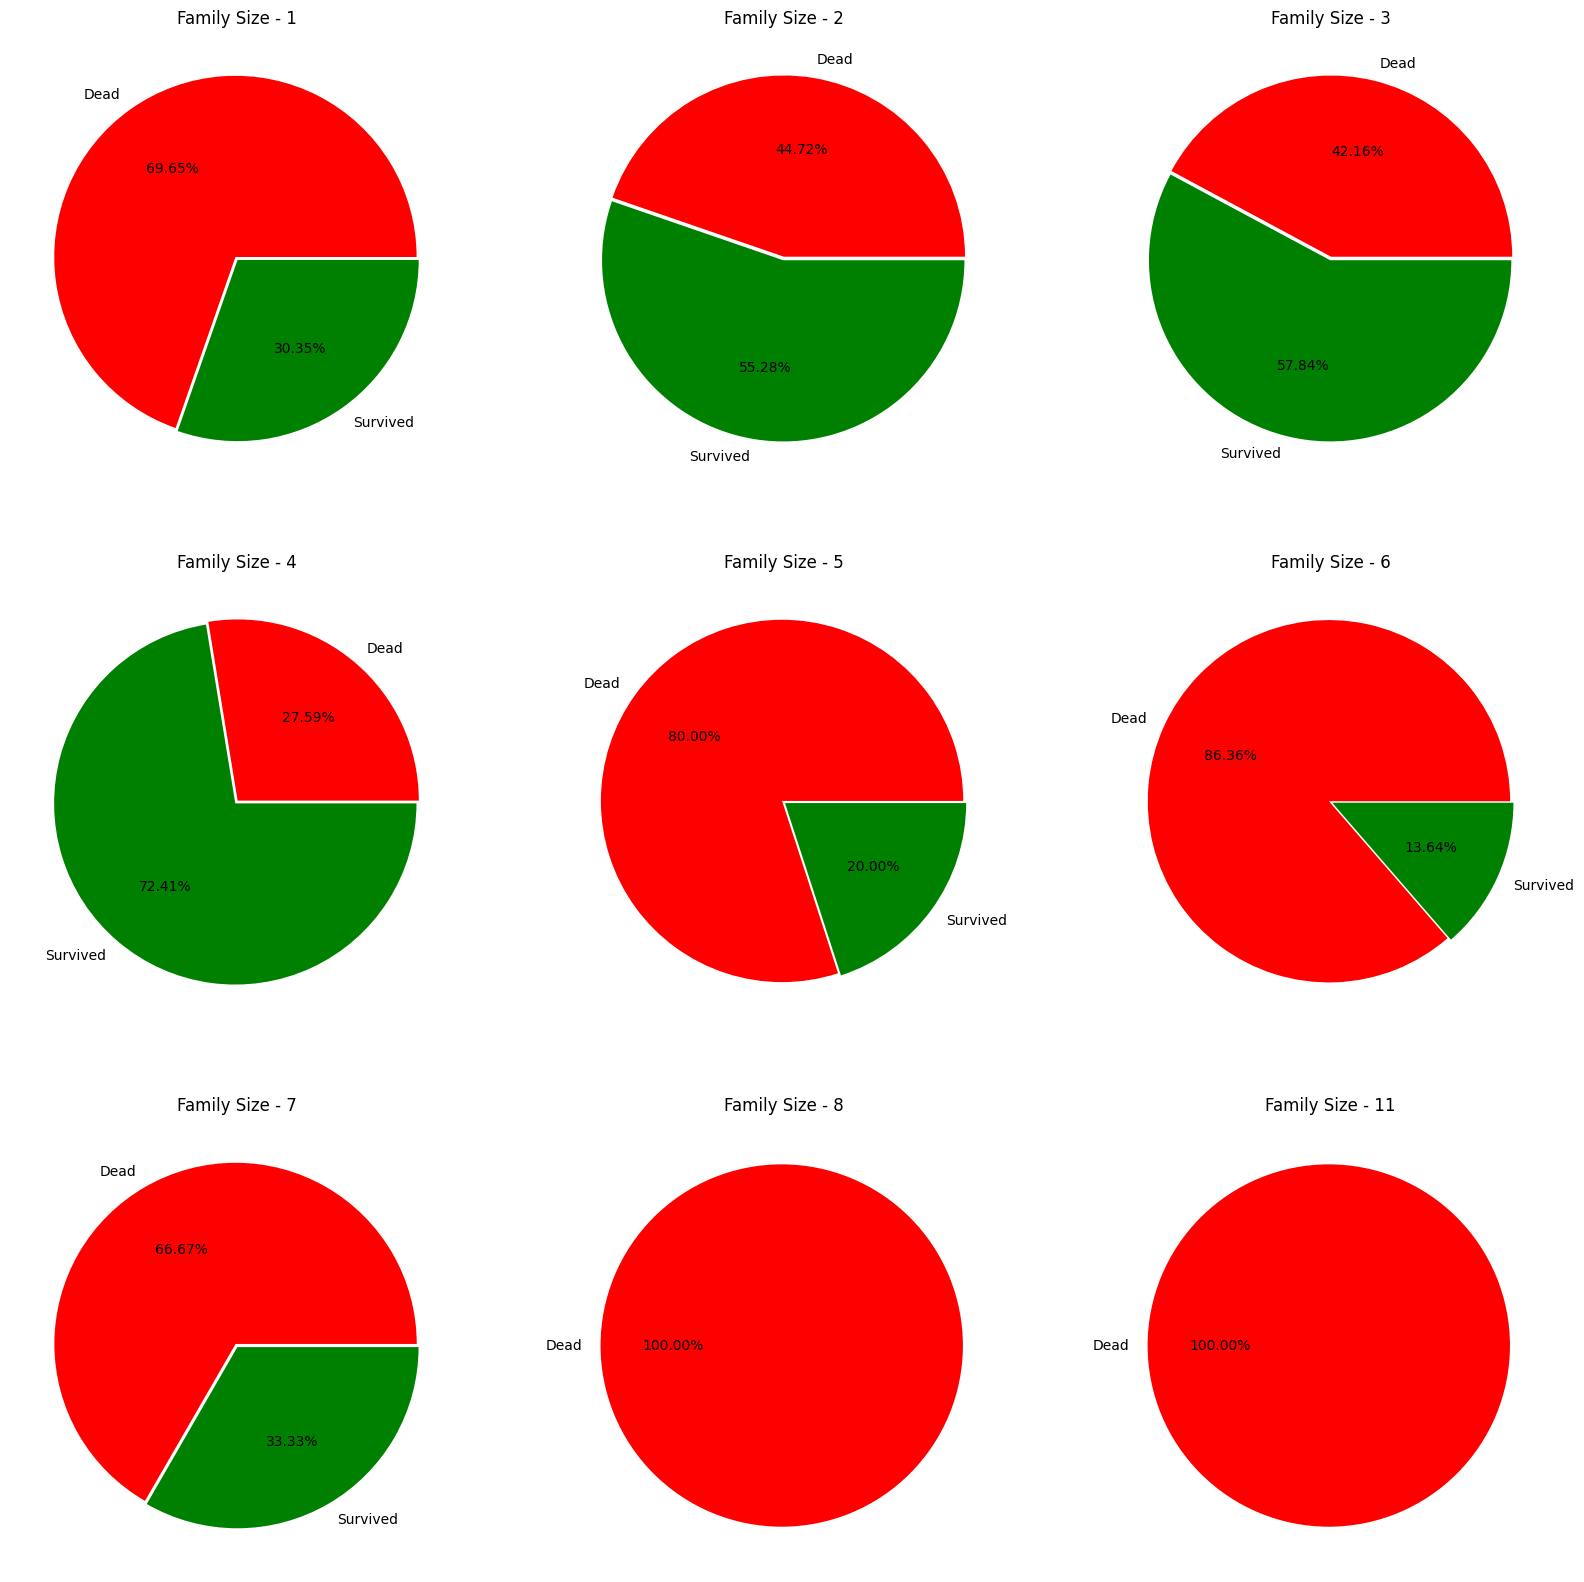

In [52]:

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 20), sharey=False)
axis = ax.flatten()
for i, famSize in enumerate(list(df_train.groupby('Family_Size')['Survived'].value_counts().unstack().index)):
    d = df_train[df_train['Family_Size'] == famSize].groupby('Family_Size')['Survived'].value_counts().unstack().iloc[0]
    axis[i].pie(d, labels = d.index.map(lambda x: 'Survived' if x == 1 else 'Dead'), autopct='%1.2f%%', colors=['red', 'green'], explode = [0.01] * len(d))
    axis[i].set_title(f'Family Size - {famSize}')
plt.show()

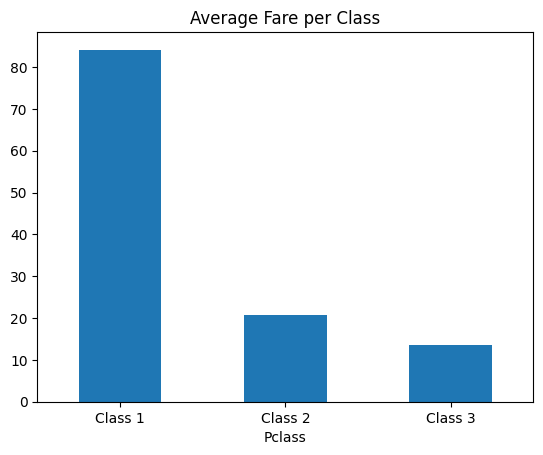

In [53]:
#fares wrt classes
df_train.groupby('Pclass')['Fare'].mean().plot(kind = 'bar')
plt.title('Average Fare per Class')
plt.xticks(rotation = 0, ticks = [0,1,2], labels = df_train.groupby('Pclass')['Fare'].mean().index.map(lambda x : f'Class {x}'))
plt.show()

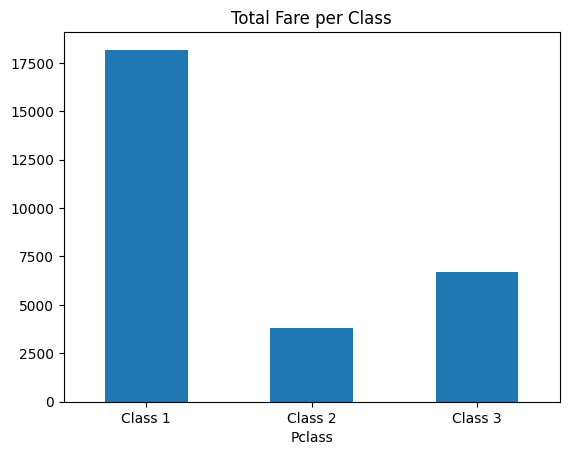

In [54]:
#fares wrt classes
df_train.groupby('Pclass')['Fare'].sum().plot(kind = 'bar')
plt.title('Total Fare per Class')
plt.xticks(rotation = 0, ticks = [0,1,2], labels = df_train.groupby('Pclass')['Fare'].sum().index.map(lambda x : f'Class {x}'))
plt.show()

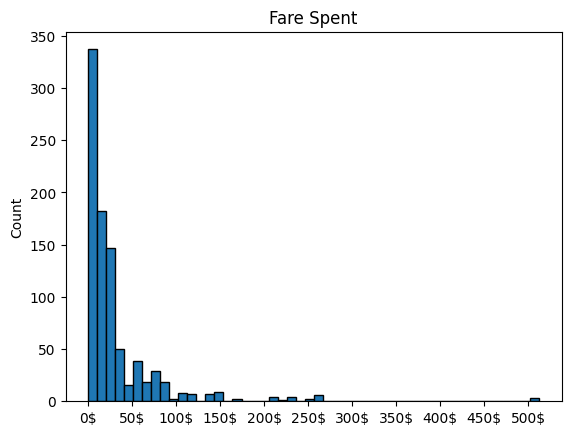

In [55]:
#Howmany spent how much amount
df_train['Fare'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Fare Spent')
plt.ylabel('Count')
plt.xticks(ticks = list(range(0, 501, 50)), labels = [f'{x}$' for x in list(range(0, 501, 50))])
plt.show()

## Data Cleaning & Feature Engineering & Data Preprocessing Encode Categorical Variables:

In [56]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_Size      0
dtype: int64

Here if we see, Age, Cabin, Embarked has null columns

In [57]:
label_encoder = preprocessing.LabelEncoder()
numeric_features = ['Age', 'Family_Size']
scaler = StandardScaler()
def dataCleaning(df):
    ###DELETING NON USABLE COLUMNS, these columns wont affect survival
    #cabin has most null so deleting
    df['Family_Size'] = df['Parch'] + df['SibSp'] + 1
    del_cols = ['PassengerId', 'Cabin', 'Ticket', 'Name', 'Parch', 'SibSp', 'Fare']
    df.drop(columns = del_cols, inplace=True)
    df['Sex'] = label_encoder.fit_transform(df['Sex'])
    df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
    df.loc[df['Age'].isna(), 'Age'] = int(df['Age'].median())
    df[numeric_features] = scaler.fit_transform(df[numeric_features])
    return df

In [58]:
df_train = dataCleaning(df_train)

In [59]:
df_train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
Family_Size    0
dtype: int64

In [60]:
df_train.head()

,Survived,Pclass,Sex,Age,Embarked,Family_Size
0,0,3,1,-0.565736,2,0.059160
1,1,1,0,0.663861,0,0.059160
2,1,3,0,-0.258337,2,-0.560975
3,1,1,0,0.433312,2,0.059160
4,0,3,1,0.433312,2,-0.560975


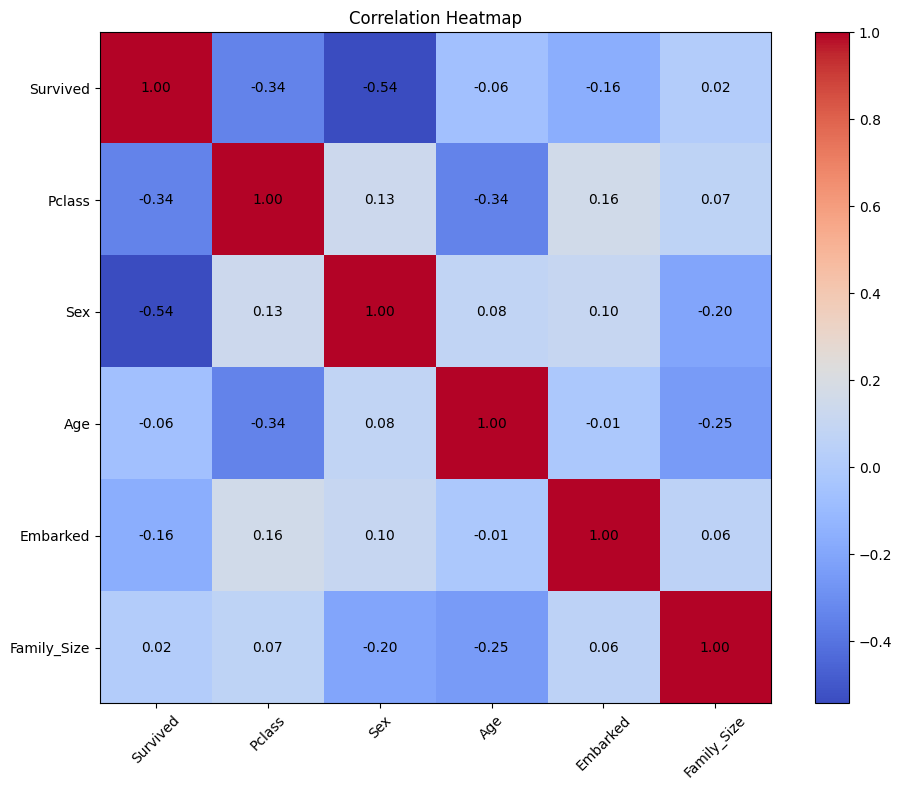

In [61]:
corr_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
heatmap = plt.imshow(corr_matrix, cmap='coolwarm')

plt.colorbar(heatmap)
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=45)
plt.yticks(ticks=np.arange(len(corr_matrix.index)), labels=corr_matrix.index)
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                 ha='center', va='center', color='black')
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()

## Model Building

In [62]:
#Spliting Data
train, test = train_test_split(df_train, test_size = 0.3, random_state = 0, stratify=df_train['Survived'])
X_train = train[train.columns[1:]]
y_train = train[train.columns[:1]]
X_test = test[test.columns[1:]]
y_test = test[test.columns[:1]]

In [63]:
model = LogisticRegression()
model.fit(X_train, y_train)
metrics.accuracy_score(model.predict(X_test), y_test)

d:\Code\virtualenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8134328358208955

In [64]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
metrics.accuracy_score(model.predict(X_test), y_test)

d:\Code\virtualenv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8171641791044776

d:\Code\virtualenv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


d:\Code\virtualenv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Code\virtualenv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Code\virtualenv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Code\virtualenv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

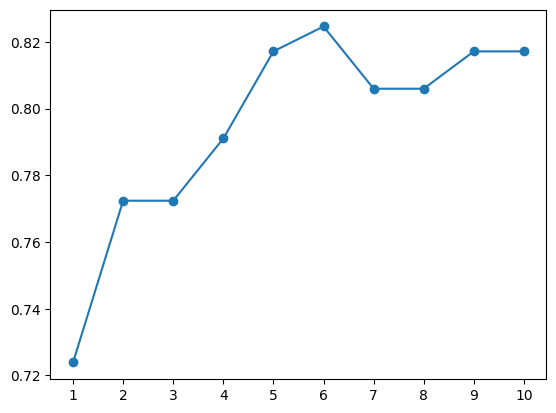

In [65]:
#changing n_neighbors
d = {}
for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    d[i] = metrics.accuracy_score(model.predict(X_test), y_test)
    
plt.plot(d.keys(), d.values(), marker = 'o', linestyle = '-')
plt.xticks(ticks = range(1, 11))
plt.show()

In [66]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
metrics.accuracy_score(model.predict(X_test), y_test)

d:\Code\virtualenv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8395522388059702

## Model Evaluation Calculate Evaluation Metrics

In [67]:
# Define a dictionary of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Dictionary to store evaluation metrics for each model
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}
all_models = {}
# Loop over the models, train and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Compute metrics
    acc   = accuracy_score(y_test, y_pred)
    prec  = precision_score(y_test, y_pred)
    rec   = recall_score(y_test, y_pred)
    f1    = f1_score(y_test, y_pred)
    
    # Save metrics
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1 Score"].append(f1)
    models[model_name] = model
    # Print evaluation details
    print(f"Model: {model_name}")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1 Score:  {f1:.4f}")
    print("  Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("  Classification Report:")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------------------------\n")

d:\Code\virtualenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: Logistic Regression
  Accuracy:  0.8134
  Precision: 0.7789
  Recall:    0.7184
  F1 Score:  0.7475
  Confusion Matrix:
[[144  21]
 [ 29  74]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       165
           1       0.78      0.72      0.75       103

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

---------------------------------------------------------

Model: Decision Tree
  Accuracy:  0.8134
  Precision: 0.8193
  Recall:    0.6602
  F1 Score:  0.7312
  Confusion Matrix:
[[150  15]
 [ 35  68]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       165
           1       0.82      0.66      0.73       103

    accuracy                           0.81       268
   macro avg       0.82      0.78      0.79       26

d:\Code\virtualenv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: Random Forest
  Accuracy:  0.8358
  Precision: 0.8554
  Recall:    0.6893
  F1 Score:  0.7634
  Confusion Matrix:
[[153  12]
 [ 32  71]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       165
           1       0.86      0.69      0.76       103

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.83       268

---------------------------------------------------------



d:\Code\virtualenv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: Support Vector Machine
  Accuracy:  0.8284
  Precision: 0.8353
  Recall:    0.6893
  F1 Score:  0.7553
  Confusion Matrix:
[[151  14]
 [ 32  71]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       165
           1       0.84      0.69      0.76       103

    accuracy                           0.83       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.83      0.82       268

---------------------------------------------------------



d:\Code\virtualenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:03:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
  Accuracy:  0.8134
  Precision: 0.8272
  Recall:    0.6505
  F1 Score:  0.7283
  Confusion Matrix:
[[151  14]
 [ 36  67]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       165
           1       0.83      0.65      0.73       103

    accuracy                           0.81       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.82      0.81      0.81       268

---------------------------------------------------------



In [68]:
# Create a DataFrame for visualization
metrics_df = pd.DataFrame(metrics).set_index('Model')
metrics_df

,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.813433,0.778947,0.718447,0.747475
Decision Tree,0.813433,0.819277,0.660194,0.731183
Random Forest,0.835821,0.855422,0.689320,0.763441
Support Vector Machine,0.828358,0.835294,0.689320,0.755319
XGBoost,0.813433,0.827160,0.650485,0.728261


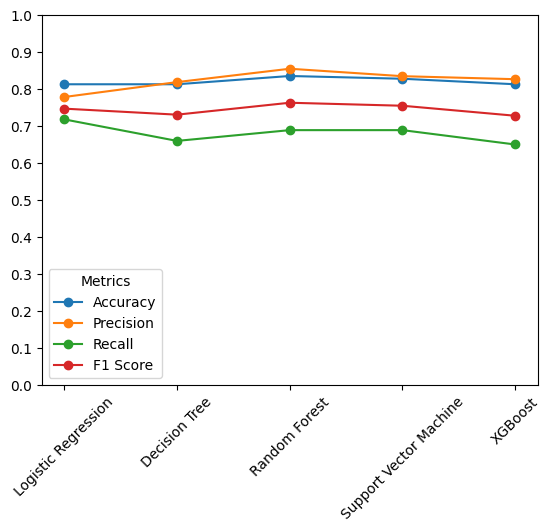

In [69]:
#Metrics Visualisation
for score in metrics_df.columns:
    plt.plot(metrics_df[score], marker = 'o')
plt.xticks(rotation=45)
plt.yticks(ticks = [x*0.1 for x in range(0, 11)])
plt.legend(title='Metrics', labels=metrics_df.columns)
plt.show()
    

***Random Forest is the best model in this case because it provides a strong balance of high accuracy, precision, and F1 score, leading to more reliable predictions for this dataset.***

Based on the evaluation metrics provided, the Random Forest model appears to be the best overall. Here's why:

Highest Accuracy:
Random Forest achieved an accuracy of 83.58%, which is higher than Logistic Regression, Decision Tree, and XGBoost. This means it correctly predicted the outcome more often than the others.

High Precision:
With a precision of 85.54%, the Random Forest model is reliable in predicting the positive class (i.e., it has fewer false positives).

Competitive F1 Score:
The F1 Score of 76.34% for Random Forest is the best among the models. The F1 Score balances precision and recall, indicating a good trade-off between correctly identifying survivors (recall) and not misclassifying non-survivors (precision).

Balanced Performance:
While Logistic Regression has slightly higher recall (71.84% vs. 68.93%), Random Forest's overall performance metrics (accuracy, precision, and F1 score) make it the more robust choice.
The SVM, despite its perfect precision (100%), suffers from very low recall (13.59%), meaning it misses many true positive cases, which is not acceptable for most applications.









In [70]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
df_test = dataCleaning(df_test)

In [72]:
df_test['Survived'] = models['Random Forest'].predict(df_test)

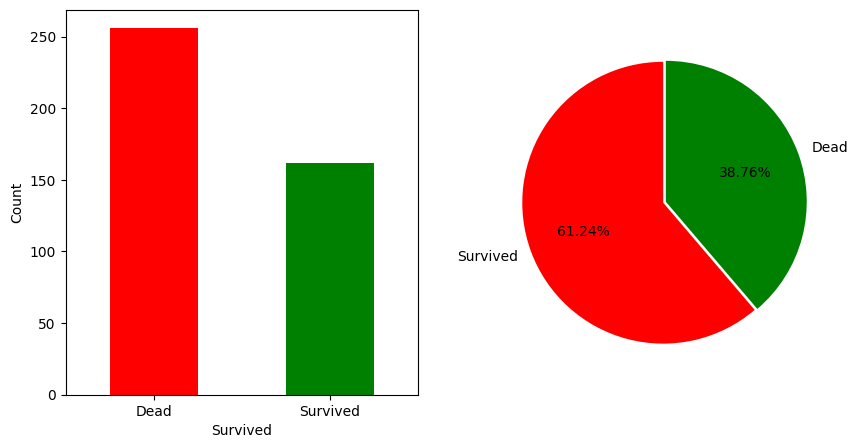

In [73]:
#Survived Analysis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=False)
df_test['Survived'].value_counts().plot(kind = 'bar', ax = axes[0], color = ['red', 'green'])
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Dead', 'Survived'], rotation = 0)

df_test['Survived'].value_counts().plot(kind = 'pie', ax = axes[1], colors = ['red', 'green'] ,labels = ['Survived', 'Dead'], autopct='%1.2f%%', startangle = 90, explode=(0.01, 0.01))
axes[1].set_ylabel('')
plt.show()